In [ ]:
!pip install pymorphy3 razdel nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 45.9 MB/s eta 0:00:00


In [ ]:
import nltk

# Скачиваем необходимые ресурсы для русского языка
nltk.download('punkt_tab')  # Для токенизации предложений на русском
nltk.download('punkt')      # Общие модели токенизации

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

✅ Успешно прочитано с кодировкой: cp1251
✅ Успешно прочитано с кодировкой: utf-8

📊 АНАЛИЗ ТЕКСТА: Пушкин
Общее количество слов: 1211
Уникальных слов: 913
TTR (лекс. разнообр.): 0.754
Средняя длина предложения: 23.7 слов
Частые части речи: {'NOUN': 331, 'ADJF': 174, 'VERB': 115, 'NPRO': 71, 'ADVB': 69}

📊 АНАЛИЗ ТЕКСТА: Ершов
Общее количество слов: 1509
Уникальных слов: 873
TTR (лекс. разнообр.): 0.579
Средняя длина предложения: 19.4 слов
Частые части речи: {'NOUN': 305, 'VERB': 194, 'PRCL': 86, 'ADJF': 76, 'PREP': 67}


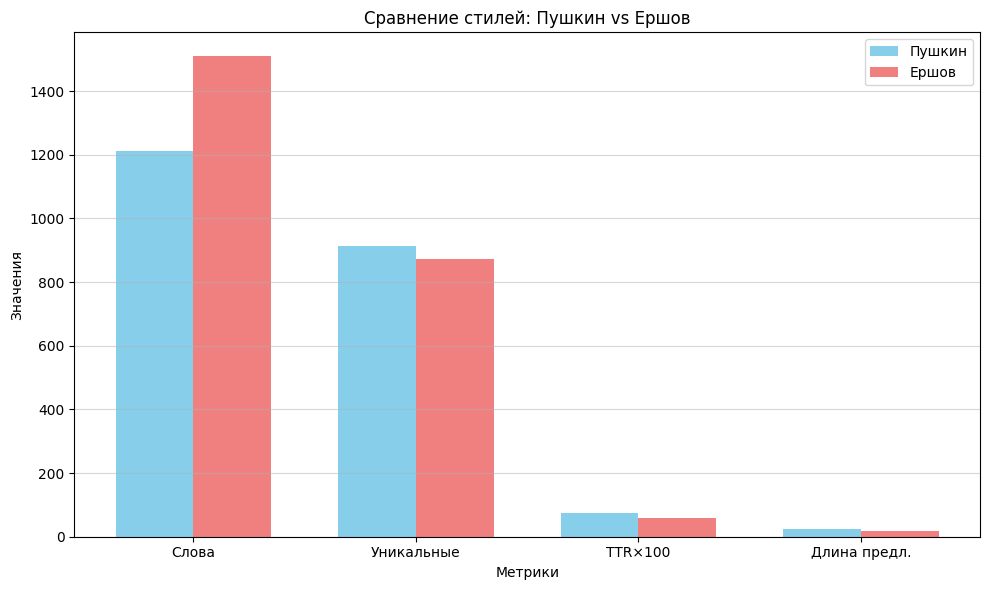

In [ ]:
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import pymorphy3
import matplotlib.pyplot as plt
from collections import Counter

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')


morph = pymorphy3.MorphAnalyzer()


def read_text_with_encoding(filepath):
    encodings = ['utf-8', 'cp1251', 'windows-1251', 'latin1']
    for enc in encodings:
        try:
            with open(filepath, 'r', encoding=enc) as f:
                text = f.read()
            print(f"✅ Успешно прочитано с кодировкой: {enc}")
            return text.strip()
        except UnicodeDecodeError:
            continue
    raise Exception(f"Не удалось прочитать файл: {filepath} ни с одной кодировкой")



pushkin_path = "/content/онегин.txt"
ershov_path = "/content/Конёк-горбунок.txt"


try:
    text_pushkin = read_text_with_encoding(pushkin_path)[:10000]
    text_ershov = read_text_with_encoding(ershov_path)[:10000]
except Exception as e:
    print(e)
    exit()



def clean_words(text):
    words = re.findall(r'[а-яА-ЯёЁ]+', text.lower())
    return [word for word in words if len(word) > 1]



def analyze_text(text, name):

    sentences = sent_tokenize(text, language='russian')
    words = clean_words(text)


    unique_words = set(words)
    ttr = len(unique_words) / len(words) if words else 0


    avg_sent_len = sum(len(word_tokenize(sent, language='russian')) for sent in sentences) / len(sentences) if sentences else 0


    pos_counter = Counter()
    for word in words[:1000]:  # ограничим для скорости
        parsed = morph.parse(word)[0]
        pos_counter[parsed.tag.POS] += 1

    print(f"\n📊 АНАЛИЗ ТЕКСТА: {name}")
    print(f"Общее количество слов: {len(words)}")
    print(f"Уникальных слов: {len(unique_words)}")
    print(f"TTR (лекс. разнообр.): {ttr:.3f}")
    print(f"Средняя длина предложения: {avg_sent_len:.1f} слов")
    print(f"Частые части речи: {dict(pos_counter.most_common(5))}")

    return {
        'name': name,
        'words_count': len(words),
        'unique_count': len(unique_words),
        'ttr': ttr,
        'avg_sent_len': avg_sent_len,
        'pos': dict(pos_counter)
    }



data_pushkin = analyze_text(text_pushkin, "Пушкин")
data_ershov = analyze_text(text_ershov, "Ершов")

labels = ['Слова', 'Уникальные', 'TTR', 'Длина предл.']
pushkin_vals = [
    data_pushkin['words_count'],
    data_pushkin['unique_count'],
    data_pushkin['ttr'],
    data_pushkin['avg_sent_len']
]
ershov_vals = [
    data_ershov['words_count'],
    data_ershov['unique_count'],
    data_ershov['ttr'],
    data_ershov['avg_sent_len']
]


pushkin_vals_norm = pushkin_vals[:2] + [pushkin_vals[2]*100, pushkin_vals[3]]
ershov_vals_norm = ershov_vals[:2] + [ershov_vals[2]*100, ershov_vals[3]]

x = range(4)
plt.figure(figsize=(10, 6))
width = 0.35
plt.bar([i - width/2 for i in x], pushkin_vals_norm, width, label='Пушкин', color='skyblue')
plt.bar([i + width/2 for i in x], ershov_vals_norm, width, label='Ершов', color='lightcoral')

plt.xlabel('Метрики')
plt.ylabel('Значения')
plt.title('Сравнение стилей: Пушкин vs Ершов')
plt.xticks(x, ['Слова', 'Уникальные', 'TTR×100', 'Длина предл.'])
plt.legend()
plt.grid(True, axis='y', alpha=0.5)
plt.tight_layout()
plt.show()